# Applying algorithms to real dataset

## Preparing libraries and dataset

In [6]:
# Load packages
import scanpy as sc
import random
import pandas as pd
import numpy as np
import anndata as ad

# Load algorithms
import sys
sys.path.append('../')
from StdApproach import StdApproach
from TrajClust import TrajClust

In [7]:
# Print packages
print('\n'.join(f'{m.__name__} {m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))

scanpy 1.6.0
pandas 1.1.5
numpy 1.19.4
anndata 0.7.5


In [8]:
# Set seed
seed = 1

In [9]:
# Load real dataset
testData = sc.read("realDataset.h5ad")

# Set AnnData to contain raw gene counts but retain neighbour information
geneList = list(testData.var.index)
testData = ad.AnnData(testData.raw.X, testData.obs, testData.raw.var, uns=testData.uns)

## Application of standard approach

/Users/munetomo/.local/lib/python3.8/site-packages/magic/magic.py:474: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(
/Users/munetomo/opt/anaconda3/envs/sca/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X, adata.var["mean"], adata.var["std"] = scale(


Optimal cluster number is 3


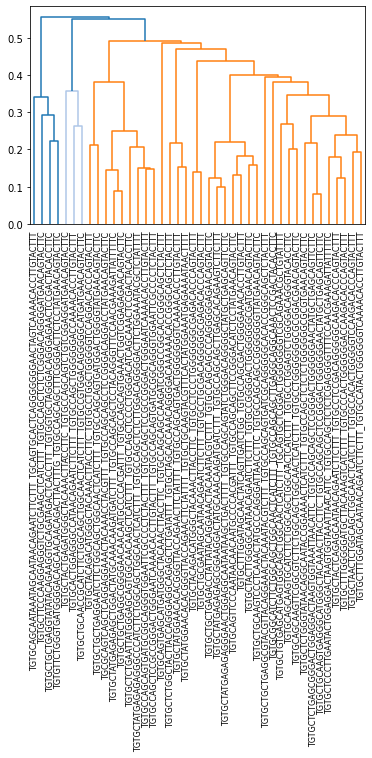

In [10]:
# Test StdApproach
resultStd = StdApproach(testData, "CloneID", showDendogram=True, impute=True, geneList=geneList, seed=seed)

## Application of TrajClust

/Users/munetomo/.local/lib/python3.8/site-packages/magic/magic.py:474: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(
/Users/munetomo/opt/anaconda3/envs/sca/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:808: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X, adata.var["mean"], adata.var["std"] = scale(
100%|██████████| 42/42 [01:02<00:00,  1.48s/it]
/Users/munetomo/opt/anaconda3/envs/sca/lib/python3.8/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/Users/munetomo/Documents/Resear

Optimal cluster number is 4


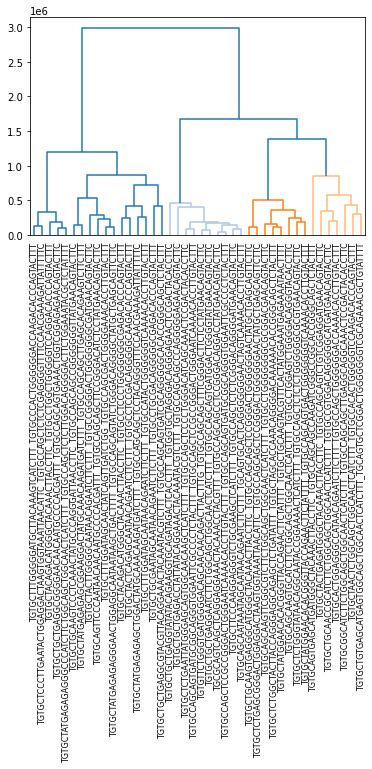

In [11]:
# Test TrajClust
resultTrajClust = TrajClust(testData, "CloneID", "pseudotime", showDendogram=True, impute=True, geneList=geneList, seed=seed)